# Super Store Data Analysis

## The dataset contains sales details of different stores of a supermarket chain that has multiple stores in different parts of the US

With columns such as:

- Ship Mode 
- Segment
- Country
- City
- State
- Postal code
- Region
- Category
- Sub-category
- Sales
- Quantity
- Discount
- Profit

### My goal is to perform EDA/Preliminary analysis on this dataset, essentially to find any trends, patterns, anything that will provide insight into the dataset. 

# Initial Data Exploration

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import the data 
ssdata = pd.read_csv('SampleSuperstore.csv')
ssdata.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:
# Inspect the data | get an idea of what I'm working with in terms of data types, columns, number of entries, etc. 
ssdata.info()

#ssdata.shape

# Basic Descriptive statistical info about dataset
#ssdata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
# There 49 states (inlcuding D.C.) - notice there is no data for Alaska and Hawaii - wonder why?
sorted(ssdata.State.unique())

In [41]:
# Let's see if there are any duplicates, if so, drop them
#ssdata.duplicated().sum() -- 17 duplicates

# Take a look at the duplicates just for fun
#ssdata[ssdata.duplicated()]

# Drop duplicates
ssdata.drop_duplicates(inplace = True)

## Further exploration into different Ship Modes, Segments, Categories, Sub-Categories

In [87]:
round(ssdata['Ship Mode'].value_counts(normalize = True), 3)

Standard Class    0.597
Second Class      0.195
First Class       0.154
Same Day          0.054
Name: Ship Mode, dtype: float64

Standard Class accounts for almost 60% of sales -- That's something worth looking into!

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

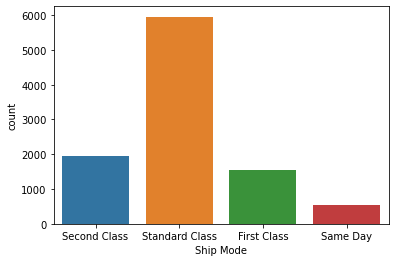

In [89]:
sns.countplot(x = ssdata['Ship Mode'])

In [90]:
round(ssdata['Segment'].value_counts(normalize = True), 3)

Consumer       0.519
Corporate      0.302
Home Office    0.178
Name: Segment, dtype: float64

Consumers account for over half of all sales

<AxesSubplot:xlabel='Segment', ylabel='count'>

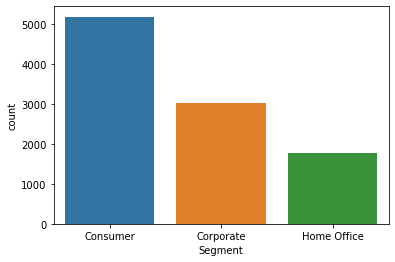

In [92]:
sns.countplot(x = ssdata['Segment'])

In [93]:
round(ssdata['Category'].value_counts(normalize = True), 3)

Office Supplies    0.603
Furniture          0.212
Technology         0.185
Name: Category, dtype: float64

<AxesSubplot:xlabel='Category', ylabel='count'>

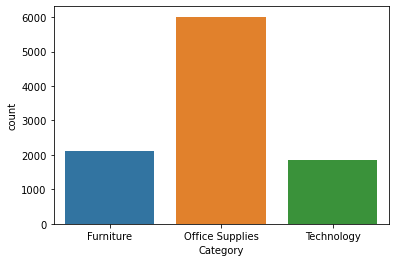

In [94]:
sns.countplot(x = ssdata['Category'])

Office Supplies account for 60% of all sales

In [16]:
# What are the top 10 states that generate most profit
round(ssdata.groupby('State')['Profit'].sum().nlargest(10), 2)

State
California    76381.39
New York      74038.55
Washington    33402.65
Michigan      24463.19
Virginia      18597.95
Indiana       18382.94
Georgia       16250.04
Kentucky      11199.70
Minnesota     10823.19
Delaware       9977.37
Name: Profit, dtype: float64

In [19]:
# What are the top 10 states that generate least amount of profit
#round(ssdata.groupby('State')['Profit'].sum().nsmallest(10), 2)

# Add code for all states that are generating loss 
loss_profit = round(ssdata.groupby('State')['Profit'].sum(), 2)
loss_profit0 = loss_profit[loss_profit < 0]
loss_profit0

State
Arizona           -3427.92
Colorado          -6527.86
Florida           -3399.30
Illinois         -12607.89
North Carolina    -7490.91
Ohio             -16971.38
Oregon            -1190.47
Pennsylvania     -15559.96
Tennessee         -5341.69
Texas            -25729.36
Name: Profit, dtype: float64

In [124]:
# Which region has the most profit and sales
round(ssdata.groupby('Region')[['Profit', 'Sales']].sum(), 3).sort_values(by = ['Sales'], ascending = False)

,Profit,Sales
Region,,
West,108329.808,725255.636
East,91506.309,678435.196
Central,39655.875,500782.853
South,46749.430,391721.905


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

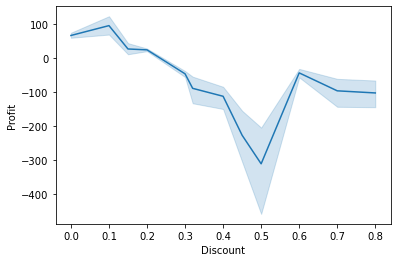

In [126]:
# Discount vs Profit
sns.lineplot(data = ssdata, x = 'Discount', y = 'Profit')

## Visually, there is a somewhat downward trend as the discount increases, profit decreases which makes sense

In [149]:
# Ship Mode vs Sales
round(ssdata.groupby('Ship Mode')['Sales'].sum(), 3).sort_values(ascending = False)

Ship Mode
Standard Class    1357316.349
Second Class       459177.045
First Class        351380.471
Same Day           128321.725
Name: Sales, dtype: float64

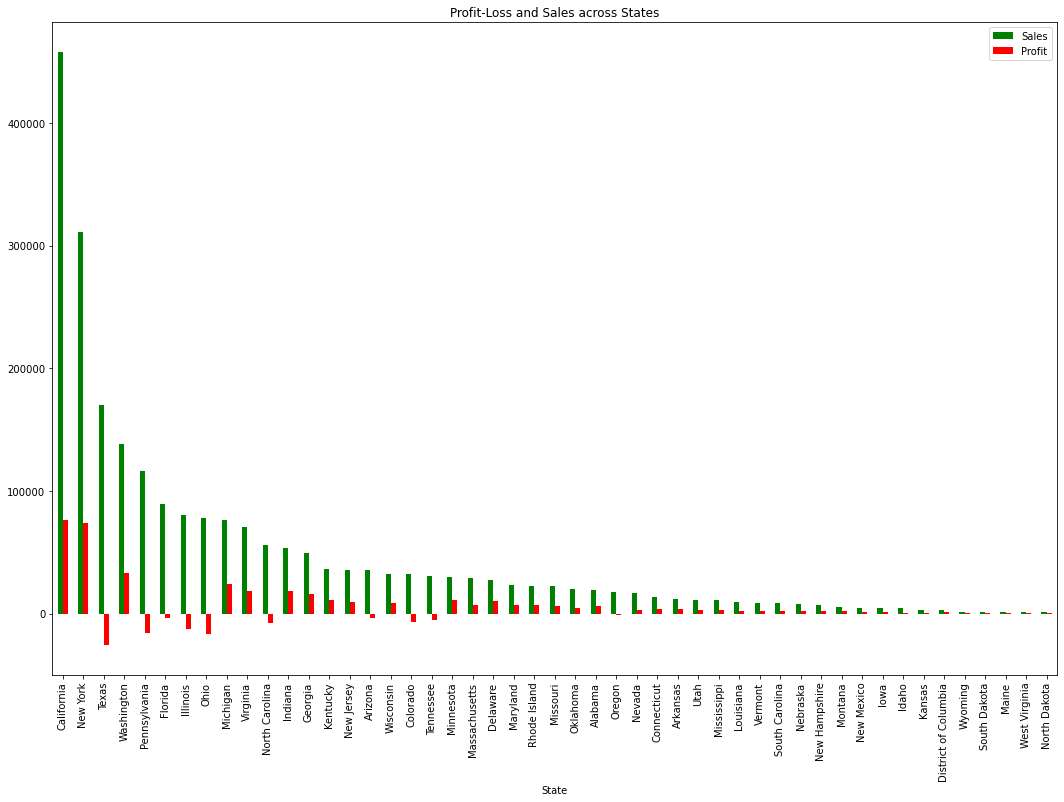

In [20]:
# ssdata[ssdata.State == "Texas"]["Profit"].sum()

#Profit vs Sales

state_profit = ssdata.groupby("State")[["Sales","Profit"]].sum().sort_values(by = "Sales", ascending = False)
state_profit[:].plot.bar(color = ["Green", "Red"], figsize = (18,12))
plt.title("Profit-Loss and Sales across States")
plt.show()

# Takeaways

The west region generates the most profit and sales while the Central is the lowest in Profit and South is the lowets in Sales

There are 10 states generating a loss, 6 of the states have relatively high sales

51% of sales are consumer bought and just over 60% of sales are Office Supplies

I think next steps would be to figure out why the South and Central regions are generating a loss and why sales are relatively low compared to the other regions (No data to explain opertating costs, etc). Texas has the 3rd most sales, why is it not turning a profit?

Also with more data we could explore the vast difference in Category of sales -- Office Supplies is sold more than furniture and Technology, why? Is that something that can be helped? 
